## Module 10
### Part 1: Analyze and Explore the Climate Data

In [1]:
# Imports
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
#session.query(Measurement.date).order_by(Measurement.date.desc()).first()
session.query(func.max(Measurement.date)).scalar()

'2017-08-23'

In [45]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
twelve_months = dt.date(2017, 8, 23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
twelve_months_precip = session.query(Measurement.date, Measurement.prcp).filter\
(Measurement.date >= twelve_months).all()

# Save the query results as a Pandas DataFrame and set the index to the date colum
precip_df = pd.DataFrame(twelve_months_precip, columns = ['date', 'prcp']).set_index('date')
precip_df.dropna(inplace=True)

# Sort the dataframe by date
precip_df.sort_index()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


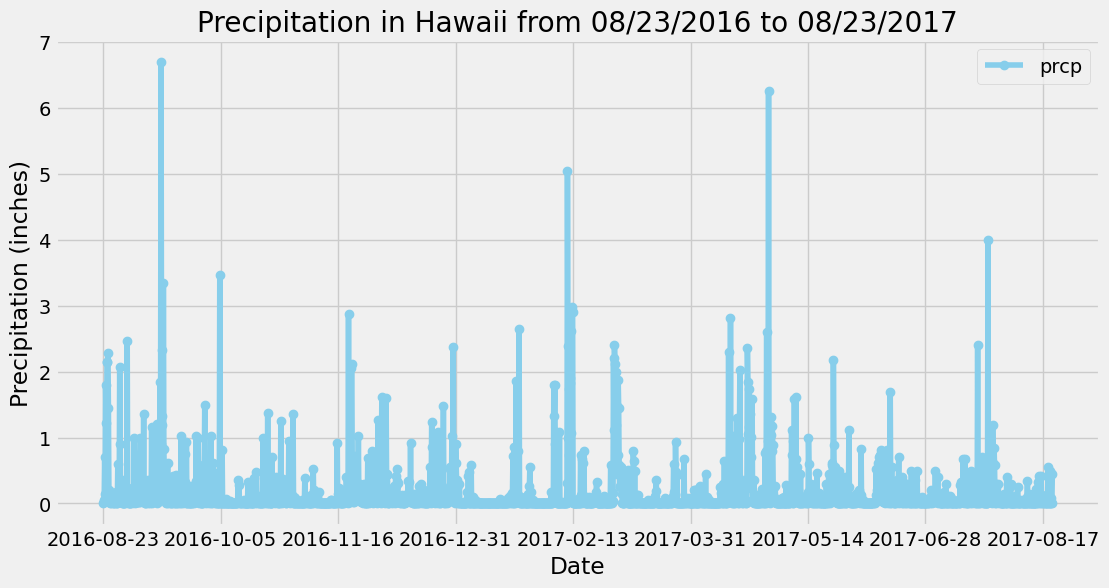

In [57]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.sort_index().plot(kind='line', figsize=(12, 6), color='skyblue', marker='o')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation in Hawaii from 08/23/2016 to 08/23/2017')
plt.show()



In [40]:
# Use Pandas to calcualte the summary statistics for the precipitation data
stats_precip_df = precip_df.describe()
print(stats_precip_df)

              prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


# Exploratory Station Analysis

In [58]:
# Design a query to calculate the total number stations in the dataset
session.query(Station).count()

9

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()